In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Date and model wise sale.csv")

In [7]:
data.head()

,Date,Model,Count
0,2016-08-31,M45,5
1,2016-08-31,M121,3
2,2016-08-31,M122,4
3,2016-08-31,M91,10
4,2016-08-31,M66,57


In [8]:
data.shape

(46116, 3)

In [9]:
data.describe()

,Count
count,46116.000000
mean,96.690108
std,315.065946
min,1.000000
25%,3.000000
50%,14.000000
75%,67.000000
max,6678.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    46116 non-null  datetime64[ns]
 1   Model   46116 non-null  object        
 2   Count   46116 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


In [11]:
# "date" column is object type. lets convert it to date type
data['Date']=pd.to_datetime(data['Date'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    46116 non-null  datetime64[ns]
 1   Model   46116 non-null  object        
 2   Count   46116 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


### Let's check whether there are any missing data in dataset

In [13]:
data.isnull().sum()

Date     0
Model    0
Count    0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

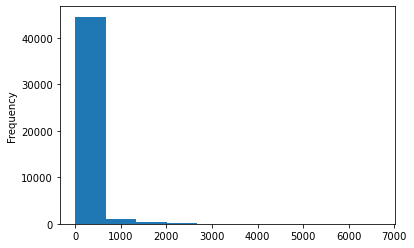

In [14]:
data.Count.plot.hist()

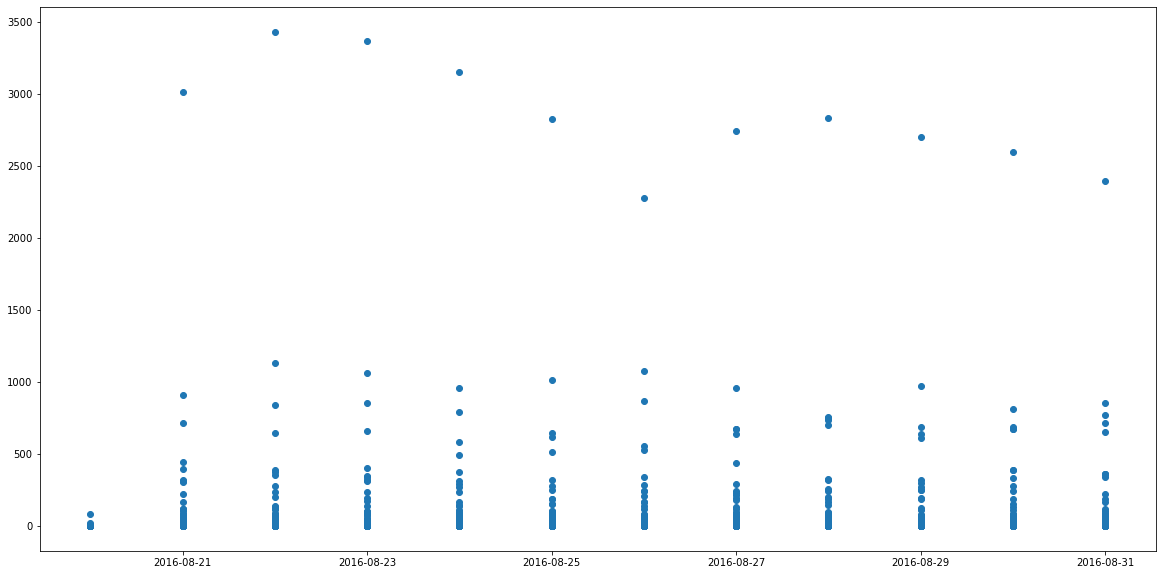

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data["Date"][:1000], data["Count"][:1000])

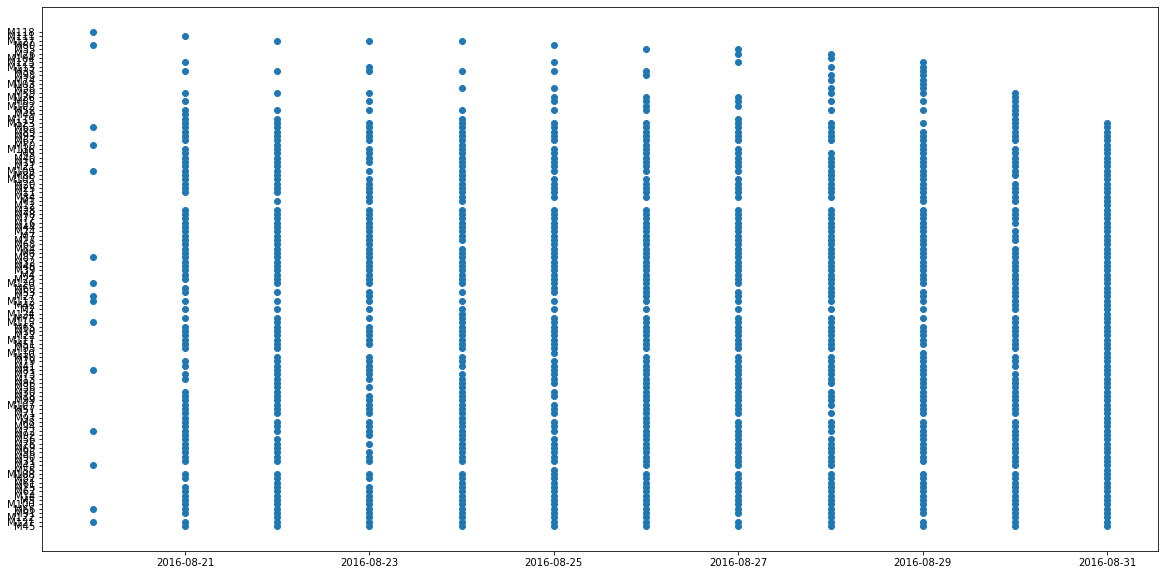

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data["Date"][:1000], data["Model"][:1000])

In [18]:
# Sort DataFrame in date order
data.sort_values(by=["Date"], inplace=True, ascending=True)
data.Date.head(20)

46115   2014-01-01
46109   2014-01-01
46110   2014-01-01
46114   2014-01-01
46112   2014-01-01
46111   2014-01-01
46113   2014-01-01
46105   2014-01-02
46108   2014-01-02
46107   2014-01-02
46106   2014-01-02
46104   2014-01-03
46103   2014-01-04
46102   2014-01-04
46101   2014-01-07
46100   2014-01-07
46097   2014-01-09
46098   2014-01-09
46099   2014-01-09
46096   2014-01-10
Name: Date, dtype: datetime64[ns]

In [19]:
#store a copy of the original dataset
dataset = data
dataset.head()

,Date,Model,Count
46115,2014-01-01,M58,1
46109,2014-01-01,M88,2
46110,2014-01-01,M55,384
46114,2014-01-01,M54,1
46112,2014-01-01,M59,1


In [20]:
type(dataset)

pandas.core.frame.DataFrame

In [21]:
# Adding date features
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

Let's see the yearly,monthly and daily basis sale for models.

In [22]:
sell_by_day = data.groupby('day')['Count'].sum()
sell_by_day

day
1     129570
2     132735
3     139238
4     141329
5     145545
6     148475
7     140257
8     140776
9     142784
10    145601
11    154731
12    153357
13    156208
14    161472
15    157697
16    158552
17    160805
18    160951
19    144492
20    148991
21    147787
22    145050
23    150953
24    147542
25    140165
26    139724
27    137988
28    143167
29    135071
30    128155
31     79793
Name: Count, dtype: int64

<AxesSubplot:title={'center':' Sale on each day from 2014 to 2016 '}, xlabel='day', ylabel='Sale amount'>

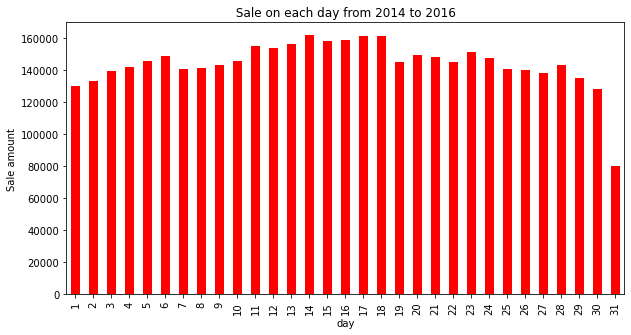

In [23]:
#Sell on each day of a month from 2014 to 2016
plt.figure(figsize=(10,5))
plt.title(' Sale on each day from 2014 to 2016 ')
plt.ylabel('Sale amount')
data.groupby('day').Count.sum().plot(kind='bar', color='red')

In [24]:
sell_by_month = data.groupby('month')['Count'].sum()
sell_by_month

month
1     251353
2     260113
3     281343
4     270841
5     321164
6     481399
7     808157
8     703693
9     351850
10    296351
11    218058
12    214639
Name: Count, dtype: int64

<AxesSubplot:title={'center':' Total Sale on each month from 2014 to 2016'}, xlabel='month', ylabel='Sale amount'>

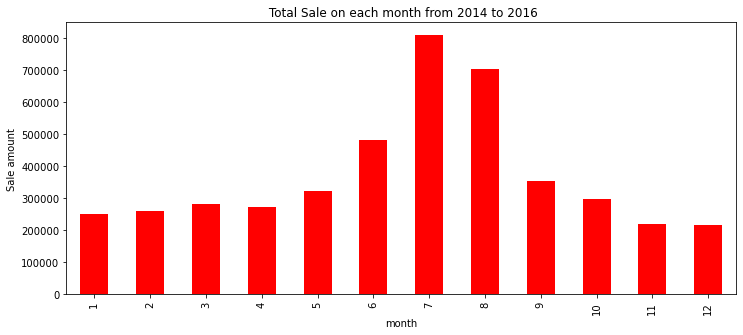

In [25]:
#Total sell on each month throughout 2014-2016
plt.figure(figsize=(12,5))
plt.title(' Total Sale on each month from 2014 to 2016')
plt.ylabel('Sale amount')
data.groupby('month').Count.sum().plot(kind='bar',color='red')

month 7 (July) has the highest sell
sell is increasing till month 7. then its decreasing.

In [26]:
#Sell by year
sell_by_year = data.groupby('year')['Count'].sum()
sell_by_year

year
2014     370989
2015    2024037
2016    2063935
Name: Count, dtype: int64

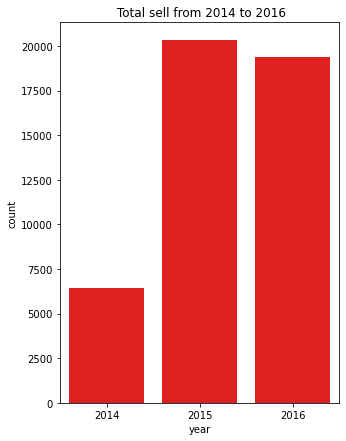

In [27]:
plt.figure(figsize=(5,7))
plt.title(' Total sell from 2014 to 2016')
sns.countplot(x='year', data=data, color='red');

2015 has the highest sell

In [28]:
data.nunique()

Date      971
Model     124
Count    1191
day        31
month      12
year        3
dtype: int64

In [29]:
data.Model.unique()

array(['M58', 'M88', 'M55', 'M54', 'M59', 'M74', 'M60', 'M97', 'M119',
       'M35', 'M70', 'M120', 'M49', 'M51', 'M34', 'M29', 'M37', 'M122',
       'M61', 'M94', 'M25', 'M76', 'M118', 'M125', 'M79', 'M101', 'M7',
       'M27', 'M30', 'M33', 'M26', 'M44', 'M106', 'M52', 'M68', 'M102',
       'M85', 'M36', 'M95', 'M28', 'M114', 'M75', 'M43', 'M69', 'M50',
       'M103', 'M1', 'M80', 'M48', 'M92', 'M111', 'M110', 'M71', 'M6',
       'M86', 'M121', 'M124', 'M21', 'M57', 'M93', 'M108', 'M53', 'M107',
       'M81', 'M13', 'M56', 'M113', 'M24', 'M104', 'M62', 'M38', 'M22',
       'M5', 'M89', 'M31', 'M45', 'M99', 'M19', 'M2', 'M23', 'M66',
       'M105', 'M10', 'M87', 'M32', 'M15', 'M39', 'M98', 'M96', 'M63',
       'M40', 'M20', 'M17', 'M9', 'M109', 'M82', 'M123', 'M90', 'M65',
       'M41', 'M4', 'M8', 'M115', 'M117', 'M72', 'M67', 'M11', 'M64',
       'M127', 'M16', 'M116', 'M91', 'M73', 'M126', 'M77', 'M18', 'M14',
       'M47', 'M100', 'M78', 'M112', 'M84', 'M42', 'M12'], dtype=object)

In [30]:
#model and sale relationship
pd.crosstab(data.Model, data.Count)

Count,1,2,3,4,5,6,7,8,9,10,...,5656,5745,5798,6058,6123,6258,6328,6422,6482,6678
Model,,,,,,,,,,,,,,,,,,,,,
M1,87,71,35,36,13,17,8,8,11,9,...,0,0,0,0,0,0,0,0,0,0
M10,8,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
M100,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M101,96,28,19,13,15,14,10,6,15,11,...,0,0,0,0,0,0,0,0,0,0
M102,133,60,32,21,17,14,11,7,11,14,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M95,43,19,17,15,9,10,11,14,6,6,...,0,0,0,0,0,0,0,0,0,0
M96,15,3,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M97,98,85,73,22,27,8,4,7,5,12,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#model and sale relationship 
models_by_sale = data.groupby('Model')['Count'].sum()
models_by_sale.sort_values(axis=0, ascending=False, inplace=True)

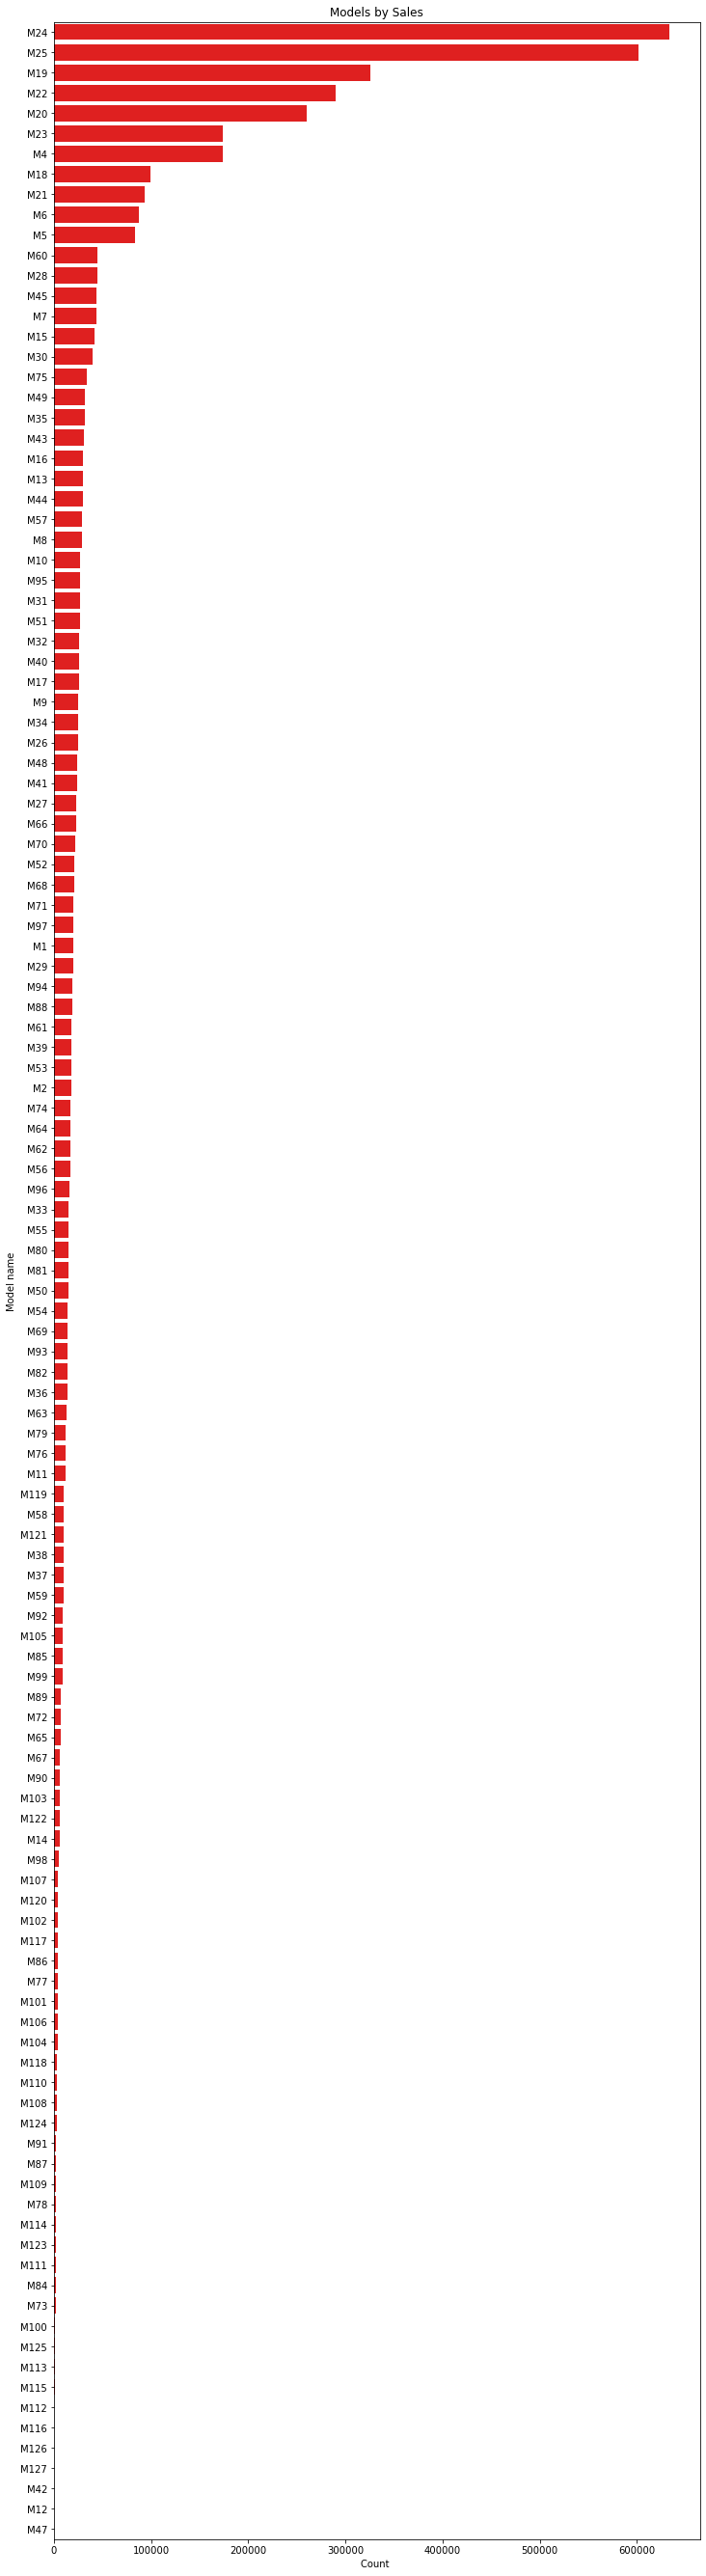

In [32]:
#figure model by count
f, ax = plt.subplots(figsize=(12, 48))
ax=sns.barplot(models_by_sale, models_by_sale.index,orient='h', color='red')
ax.set(title='Models by Sales',xlabel='Count ', ylabel='Model name')
plt.show()

M24 is the most popular tv model

In [33]:
#top 5 models
models_by_sale.head(5)

Model
M24    632968
M25    601395
M19    325701
M22    289524
M20    259690
Name: Count, dtype: int64

In [34]:
#not successful 5 models
models_by_sale.tail(5)

Model
M126    148
M127    113
M42      17
M12       4
M47       3
Name: Count, dtype: int64

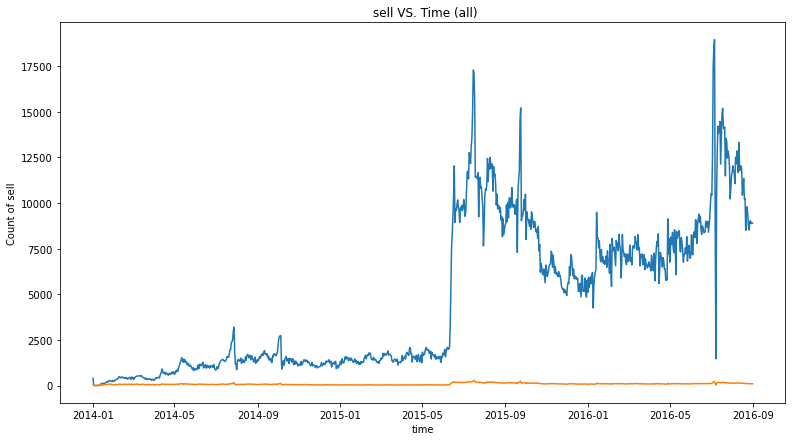

In [35]:
data['Date'] = pd.to_datetime(data['Date']) 
gp_time = data.groupby('Date')['Count'].apply(lambda x: x.sum())
gp_time_mean = data.groupby('Date')['Count'].apply(lambda x: x.count())

plt.figure(figsize=(13,7))
plt.title(' sell VS. Time (all)')
plt.ylabel('Count of sell')
plt.xlabel('time')
plt.plot(gp_time.index,gp_time)
plt.plot(gp_time_mean.index,gp_time/gp_time_mean)
plt.show()

In [ ]:
Correlations of Features

In [3]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,Model,Count,day,month,year
Model,1.000000,-0.075704,0.000894,-0.000259,0.063109
Count,-0.075704,1.000000,-0.001421,0.034535,0.043856
day,0.000894,-0.001421,1.000000,0.010132,-0.003592
month,-0.000259,0.034535,0.010132,1.000000,-0.424982
year,0.063109,0.043856,-0.003592,-0.424982,1.000000


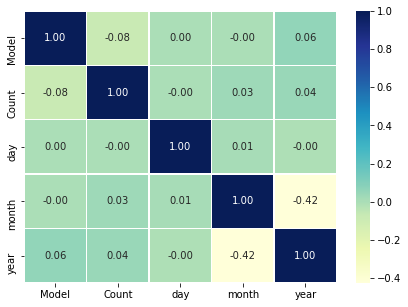

In [8]:
# Let's visulize the co-relation matix with heat map
corr_matrix = df.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [15]:
df_14 = df[df.year == 2014]
df_15 = df[df.year == 2015]
df_16 = df[df.year == 2016]

In [16]:
df_14 = df_14.drop("year", axis=1)
df_15 = df_15.drop("year", axis=1)
df_16 = df_16.drop("year", axis=1)

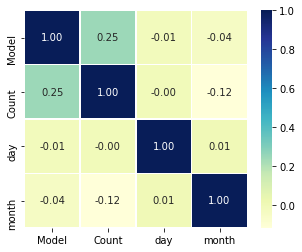

In [14]:
# Let's visulize the co-relation matix with heat map for year 2014
corr_matrix = df_14.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");


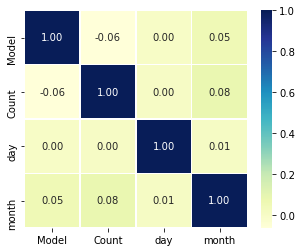

In [17]:
# Let's visulize the co-relation matix with heat map for year 2015
corr_matrix = df_15.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

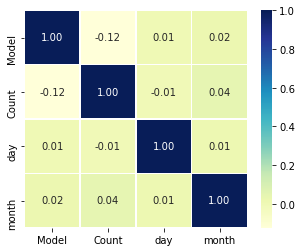

In [18]:
# Let's visulize the co-relation matix with heat map for year 2016
corr_matrix = df_16.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

### saveing the current dataset

In [38]:
data.to_csv('TV_sell.csv', index=False)

In [ ]:
data = pd.read_csv("TV_sell.csv")

In [37]:
data.Date

46115   2014-01-01
46109   2014-01-01
46110   2014-01-01
46114   2014-01-01
46112   2014-01-01
           ...    
66      2016-08-31
67      2016-08-31
68      2016-08-31
59      2016-08-31
0       2016-08-31
Name: Date, Length: 46116, dtype: datetime64[ns]

In [49]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


### Convert strings to categories
One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.

In [55]:
df = data

In [56]:
type(df)

pandas.core.frame.DataFrame

In [57]:
# Drop original date column
df.drop("Date", axis=1, inplace=True)

In [58]:
df.head(3)

,Model,Count,day,month,year
46115,M58,1,1,1,2014
46109,M88,2,1,1,2014
46110,M55,384,1,1,2014


In [59]:
df.head().T

,46115,46109,46110,46114,46112
Model,M58,M88,M55,M54,M59
Count,1,2,384,1,1
day,1,1,1,1,1
month,1,1,1,1,1
year,2014,2014,2014,2014,2014


In [61]:
pd.api.types.is_string_dtype(df["Model"])

True

In [62]:
# These columns contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Model


In [63]:
# This will turn all of the string values into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46116 entries, 46115 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Model   46116 non-null  category
 1   Count   46116 non-null  int64   
 2   day     46116 non-null  int64   
 3   month   46116 non-null  int64   
 4   year    46116 non-null  int64   
dtypes: category(1), int64(4)
memory usage: 3.1 MB


In [71]:
# Turn categorical variables into numbers
for label, content in df.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df[label] = pd.Categorical(content).codes+1

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46116 entries, 46115 to 0
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Model             46116 non-null  int8 
 1   Count             46116 non-null  int64
 2   day               46116 non-null  int64
 3   month             46116 non-null  int64
 4   year              46116 non-null  int64
 5   Model_is_missing  46116 non-null  bool 
dtypes: bool(1), int64(4), int8(1)
memory usage: 3.1 MB


In [73]:
df.head()

,Model,Count,day,month,year,Model_is_missing
46115,80,1,1,1,2014,False
46109,112,2,1,1,2014,False
46110,77,384,1,1,2014,False
46114,76,1,1,1,2014,False
46112,81,1,1,1,2014,False


all our data is numerical now

### saveing the nemerical dataset

In [74]:
df2 = df

In [75]:
df2.drop("Model_is_missing", axis=1, inplace=True)

In [76]:
df2.to_csv('Numerical_TV_sell_dataset.csv', index=False)

In [3]:
df = pd.read_csv("Numerical_TV_sell_dataset.csv")

# Modelling

we're working on a time series problem. using past events to try and predict future events. randomly splitting our data into train and test sets using something like train_test_split() wouldn't work. we split our data into training, validation and test sets using the date each sample occured.

## Split data into training and validation and testing

In [81]:
df.year.value_counts()

2015    20309
2016    19373
2014     6434
Name: year, dtype: int64

***In our case:

**Training = all samples up until 2016
**Valid = all samples form January 1, 2016 - April 30, 2016
**Test = all samples from May 1, 2016 - augest 31, 2016

In [4]:
df_train = df[df.year != 2016]

len(df_train)

26743

In [160]:
df_train

,Model,Count,day,month,year
0,80,1,1,1,2014
1,112,2,1,1,2014
2,77,384,1,1,2014
3,76,1,1,1,2014
4,81,1,1,1,2014
...,...,...,...,...,...
26738,47,2,31,12,2015
26739,72,2,31,12,2015
26740,23,5,31,12,2015
26741,48,5,31,12,2015


In [152]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26743 entries, 46115 to 19419
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Model   26743 non-null  int8 
 1   Count   26743 non-null  int64
 2   day     26743 non-null  int64
 3   month   26743 non-null  int64
 4   year    26743 non-null  int64
dtypes: int64(4), int8(1)
memory usage: 1.0 MB


In [5]:
val_train = df[df.year == 2016]
len(val_train), 

(19373,)

In [6]:
val_train.head()

,Model,Count,day,month,year
26743,14,3,1,1,2016
26744,39,729,1,1,2016
26745,41,490,1,1,2016
26746,10,11,1,1,2016
26747,99,27,1,1,2016


In [7]:
m1 = val_train[val_train.month == 1]
len(m1)

2265

In [8]:
m1.head()

,Model,Count,day,month,year
26743,14,3,1,1,2016
26744,39,729,1,1,2016
26745,41,490,1,1,2016
26746,10,11,1,1,2016
26747,99,27,1,1,2016


In [9]:
m2 = val_train[val_train.month == 2]
len(m2)

2178

In [10]:
m3 = val_train[val_train.month == 3]
len(m3)

2307

In [11]:
m4 = val_train[val_train.month == 4]
len(m4)

2280

In [12]:
m5 = val_train[val_train.month == 5]
len(m5)

2446

In [13]:
m6 = val_train[val_train.month == 6]
len(m6)

2464

In [14]:
m7 = val_train[val_train.month == 7]
len(m7)

2633

In [15]:
m8 = val_train[val_train.month == 8]
len(m8)

2800

In [16]:
concat12 = pd.concat([m1,m2], axis=1)

In [17]:
len(concat12)

4443

In [18]:
#Merging Dataframes...........
merge12 = pd.merge(m1, m2, how='outer', on = ['Model', 'Count', 'day', 'month', 'year'])

In [19]:
len(merge12)

4443

In [20]:
merge12

,Model,Count,day,month,year
0,14,3,1,1,2016
1,39,729,1,1,2016
2,41,490,1,1,2016
3,10,11,1,1,2016
4,99,27,1,1,2016
...,...,...,...,...,...
4438,49,65,29,2,2016
4439,66,1,29,2,2016
4440,6,1,29,2,2016
4441,62,241,29,2,2016


In [21]:
merge34 = pd.merge(m3, m4, how='outer', on = ['Model', 'Count', 'day', 'month', 'year'])
len(merge34)
merge34.head()

,Model,Count,day,month,year
0,10,15,1,3,2016
1,75,47,1,3,2016
2,72,4,1,3,2016
3,119,3,1,3,2016
4,51,2,1,3,2016


In [22]:
len(merge34)

4587

In [23]:
merge1234 = pd.merge(merge12, merge34, how='outer', on = ['Model', 'Count', 'day', 'month', 'year'])
merge1234.head()

,Model,Count,day,month,year
0,14,3,1,1,2016
1,39,729,1,1,2016
2,41,490,1,1,2016
3,10,11,1,1,2016
4,99,27,1,1,2016


In [24]:
len(merge1234)

9030

In [25]:
merge56 = pd.merge(m5, m6, how='outer', on = ['Model', 'Count', 'day', 'month', 'year'])
merge78 = pd.merge(m7, m8, how='outer', on = ['Model', 'Count', 'day', 'month', 'year'])

In [26]:
merge5678 = pd.merge(merge56, merge78, how='outer', on = ['Model', 'Count', 'day', 'month', 'year'])
merge5678.head()

,Model,Count,day,month,year
0,30,2,1,5,2016
1,89,115,1,5,2016
2,122,2,1,5,2016
3,33,48,1,5,2016
4,43,552,1,5,2016


In [27]:
len(merge5678)

10343

In [28]:
df_val = merge1234
df_val

,Model,Count,day,month,year
0,14,3,1,1,2016
1,39,729,1,1,2016
2,41,490,1,1,2016
3,10,11,1,1,2016
4,99,27,1,1,2016
...,...,...,...,...,...
9025,103,1,30,4,2016
9026,120,15,30,4,2016
9027,92,6,30,4,2016
9028,8,4,30,4,2016


In [29]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9030 entries, 0 to 9029
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Model   9030 non-null   int64
 1   Count   9030 non-null   int64
 2   day     9030 non-null   int64
 3   month   9030 non-null   int64
 4   year    9030 non-null   int64
dtypes: int64(5)
memory usage: 423.3 KB


In [30]:
df_test = merge5678
len(df_test)

10343

In [31]:
df_test

,Model,Count,day,month,year
0,30,2,1,5,2016
1,89,115,1,5,2016
2,122,2,1,5,2016
3,33,48,1,5,2016
4,43,552,1,5,2016
...,...,...,...,...,...
10338,37,35,31,8,2016
10339,93,12,31,8,2016
10340,45,770,31,8,2016
10341,60,13,31,8,2016


In [32]:
# Split data into X & y
X_train, y_train = df_train.drop("Count", axis=1), df_train.Count
X_valid, y_valid = df_val.drop("Count", axis=1), df_val.Count

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((26743, 4), (26743,), (9030, 4), (9030,))

## Building an evaluation function

RMSLE = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. MAE (mean absolute error) is more about exact differences. Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

We'll also calculate the MAE and R^2.

In [33]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [49]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [52]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
show_scores(model)

{'Training MAE': 4.640539580450959,
 'Valid MAE': 99.72059911406423,
 'Training RMSLE': 0.26774046026459936,
 'Valid RMSLE': 2.354437584051599,
 'Training R^2': 0.9960961201976832,
 'Valid R^2': -0.023612333067641877}

R2 score can be negative. And its negative value denotes that the regression line is not following the trend of the data, in other words, it means that the model is not good.

## Hyperparameter tuning with RandomizedSearchCV

In [54]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 25.7 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [55]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [56]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 26.02310179832595,
 'Valid MAE': 85.68715881898521,
 'Training RMSLE': 1.0715599333506822,
 'Valid RMSLE': 1.8551347065232908,
 'Training R^2': 0.9218716650979455,
 'Valid R^2': 0.2004730849242774}

### Train a model with the best parameters

In [164]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)




Wall time: 374 ms


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [165]:
show_scores(ideal_model)

{'Training MAE': 18.932538848348695,
 'Valid MAE': 84.76369217640509,
 'Training RMSLE': 0.9070095199496605,
 'Valid RMSLE': 1.9307139146482981,
 'Training R^2': 0.957911726307021,
 'Valid R^2': 0.1769501063274107}

You can make a faster model by altering some of the hyperparameters. Particularly by lowering n_estimators since each increase in n_estimators is basically building another small model.

In [175]:
%%time
# Faster model
fast_model = RandomForestRegressor(n_estimators=50,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(X_train, y_train)

Wall time: 236 ms


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=50,
                      n_jobs=-1)

In [176]:
show_scores(fast_model)

{'Training MAE': 16.578072453055672,
 'Valid MAE': 83.7959151541329,
 'Training RMSLE': 0.8601618318330161,
 'Valid RMSLE': 1.9277445879239594,
 'Training R^2': 0.9706969043208393,
 'Valid R^2': 0.19491115672166104}

### Make predictions on test data

In [63]:
df_test_copy = df_test

In [64]:
df_test = df_test.drop("Count", axis=1)

In [65]:
df_test.shape

(10343, 4)

In [177]:
model.predict(df_test)

array([   6.59,    7.9 ,   29.95, ..., 1092.95,   63.56,   83.62])

In [178]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

In [180]:
from sklearn.metrics import r2_score
r2_score(y_test, test_preds)

-0.2657582623988264

In [181]:
test_preds

array([   6.83367832,   40.04661126,   37.62854388, ..., 1211.78997287,
         20.11619105,  135.85137617])

In [72]:
test_preds.dtype

dtype('float64')

In [73]:
test_preds_copy = test_preds

In [74]:
test_preds = test_preds.astype('int')

In [75]:
test_preds

array([   5,   35,   55, ..., 1255,   28,   72])

In [76]:
test_preds.dtype

dtype('int32')

In [77]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["Model"] = df_test["Model"]
df_preds["Count"] = test_preds
df_preds

,Model,Count
0,30,5
1,89,35
2,122,55
3,33,5
4,43,29
...,...,...
10338,37,201
10339,93,83
10340,45,1255
10341,60,28


In [78]:
df_acc = pd.DataFrame()
df_acc["Model"] = df_test_copy["Model"]
df_acc["Count"] = df_test_copy["Count"]
df_acc


,Model,Count
0,30,2
1,89,115
2,122,2
3,33,48
4,43,552
...,...,...
10338,37,35
10339,93,12
10340,45,770
10341,60,13


In [80]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["month"] = df_test["month"]
df_preds["Model"] = df_test["Model"]
df_preds["Forcast_Count"] = test_preds
df_preds["Actual_Count"] = df_test_copy["Count"]
df_preds

,month,Model,Forcast_Count,Actual_Count
0,5,30,5,2
1,5,89,35,115
2,5,122,55,2
3,5,33,5,48
4,5,43,29,552
...,...,...,...,...
10338,8,37,201,35
10339,8,93,83,12
10340,8,45,1255,770
10341,8,60,28,13


### splitting testing data into 2 parts 

In [68]:
# Split data into X & y
X_test, y_test = df_test_copy.drop("Count", axis=1), df_test_copy.Count


X_test.shape, y_test.shape

((10343, 4), (10343,))

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.metrics import fbeta_score, make_scorer

from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

### DecisionTreeRegressor: Checking Accuracy

In [83]:
dsr = DecisionTreeRegressor(random_state = 0, min_samples_split = 15,  max_depth = 10)

scores = cross_val_score(dsr, X_train, y_train, cv = 15)
display(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

array([-0.80681026, -0.63607878, -0.43073028,  0.29507642,  0.25282347,
        0.34420421, -0.03297101,  0.53106716,  0.52084121,  0.81075992,
        0.89499776,  0.86411917,  0.87704249,  0.93529352,  0.92501053])

Accuracy: 0.36 (+/- 1.14)


### RandomForestRegressor : Checking Accuracy

In [85]:
rfr = RandomForestRegressor(n_estimators = 10)

scores = cross_val_score(rfr, X_train, y_train, cv = 10)
display(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

array([-0.2397833 , -0.73258728,  0.50213916,  0.45567071,  0.25671232,
        0.47944337,  0.08083945,  0.92163191,  0.8879948 ,  0.93270258])

Accuracy: 0.35 (+/- 1.02)


### LinearRegression(): Checking Accuracy

In [139]:
lrg = LinearRegression()

scores = cross_val_score(lrg, X_train, y_train, cv = 10)
display(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

array([-0.8856794 , -0.27256314, -1.51514677, -2.09970731, -1.57414988,
       -0.01427415, -0.01915994, -0.00683173,  0.00358587, -0.10603103])

Accuracy: -0.65 (+/- 1.53)


### training on this 2 model

In [140]:
dsr.fit(X_train, y_train)
pre_y_by_dsr = dsr.predict(X_test)

rfr.fit(X_train, y_train)
pre_y_by_rfr = rfr.predict(X_test)

lrg.fit(X_train, y_train)
pre_y_by_lrg = lrg.predict(X_test)

In [146]:
# r2 scrore of DecisionTreeRegressor
r2_score(y_test, pre_y_by_dsr)



-0.530191719634385

In [147]:
# r2 scrore of RandomForestRegressor
r2_score(y_test, pre_y_by_rfr)

-0.5205152911396267

In [148]:
# r2 scrore of LinearRegression
r2_score(y_test, pre_y_by_lrg)

0.003973005409697139

In [149]:
df_temp = pd.DataFrame()
df_temp["month"] = df_test["month"]
df_temp["year"] = df_test["year"]
df_temp["Model"] = df_test["Model"]
df_temp['pred_by_decision_tree_regressor'] = pre_y_by_dsr
df_temp['pred_by_random_forest_regressor'] = pre_y_by_rfr
df_temp['pred_by_linear_regressor'] = pre_y_by_lrg
df_temp["Actual_Count"] = df_test_copy["Count"]
df_temp

,month,year,Model,pred_by_decision_tree_regressor,pred_by_random_forest_regressor,pred_by_linear_regressor,Actual_Count
0,5,2016,30,3.403941,7.4,148.645125,2
1,5,2016,89,18.282147,13.8,125.014305,115
2,5,2016,122,31.333333,29.0,111.797068,2
3,5,2016,33,1.000000,1.0,147.443558,48
4,5,2016,43,32.416667,12.0,143.438334,552
...,...,...,...,...,...,...,...
10338,8,2016,37,132.927273,105.5,166.297320,35
10339,8,2016,93,258.292035,208.4,143.868068,12
10340,8,2016,45,1200.769231,1090.6,163.093142,770
10341,8,2016,60,154.416667,91.5,157.085306,13


Text(0.5, 0, 'months')

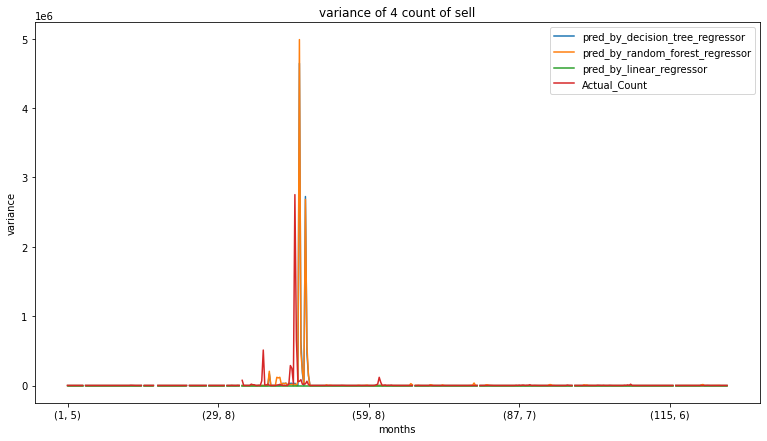

In [156]:
v = df_temp.groupby(['Model', 'month'])['pred_by_decision_tree_regressor', 'pred_by_random_forest_regressor','pred_by_linear_regressor', 'Actual_Count'].var()
v.plot(figsize=(13,7))
plt.title('variance of 4 count of sell')
plt.ylabel('variance')
plt.xlabel('months')

Text(0.5, 0, 'months')

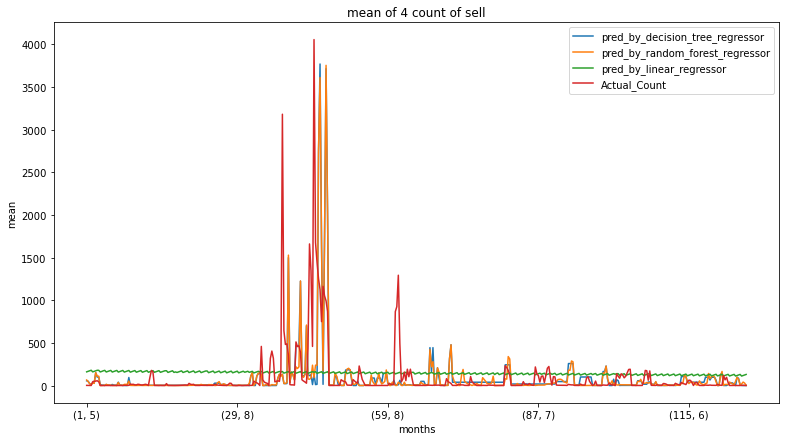

In [157]:
m = df_temp.groupby(['Model', 'month'])['pred_by_decision_tree_regressor', 'pred_by_random_forest_regressor','pred_by_linear_regressor', 'Actual_Count'].mean()
m.plot(figsize=(13,7))
plt.title('mean of 4 count of sell')
plt.ylabel('mean')
plt.xlabel('months')   

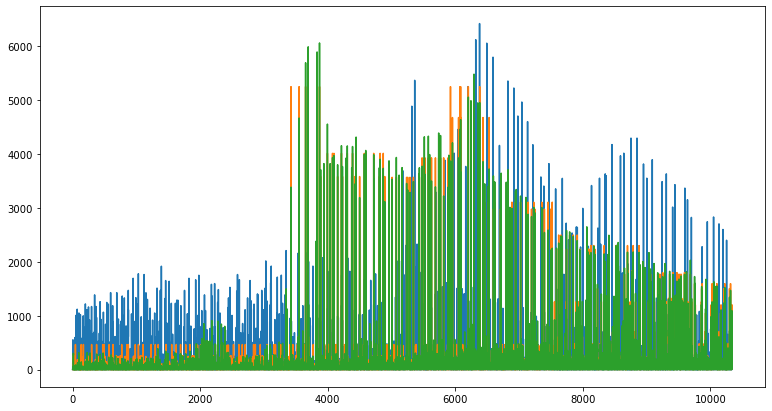

In [114]:
plt.figure(figsize=(13,7))
plt.plot(df_temp["Actual_Count"])
plt.plot(df_temp['pred_by_decision_tree_regressor'])
plt.plot(df_temp['pred_by_random_forest_regressor'])

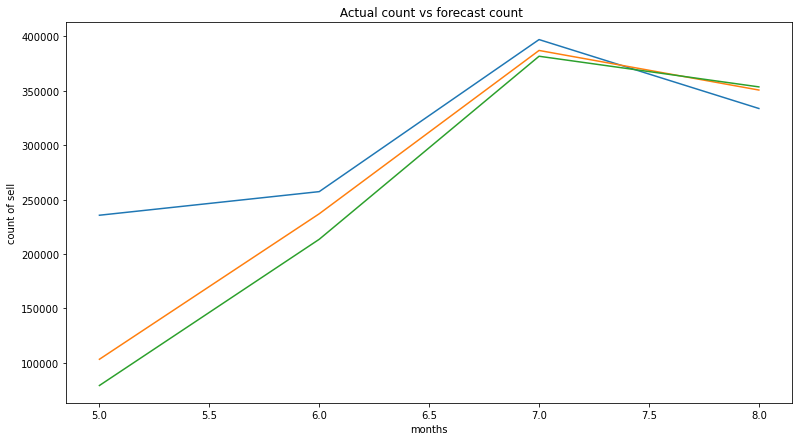

In [116]:
com1 = df_temp.groupby('month')["Actual_Count"].apply(lambda x: x.sum())
com2 = df_temp.groupby('month')["pred_by_decision_tree_regressor"].apply(lambda x: x.sum())
com3 = df_temp.groupby('month')["pred_by_random_forest_regressor"].apply(lambda x: x.sum())
plt.figure(figsize=(13,7))
plt.title(' Actual count vs forecast count')
plt.ylabel('count of sell')
plt.xlabel('months')
plt.plot(com1.index, com1)
plt.plot(com2.index, com2)
plt.plot(com3.index, com3)

blue is actual count
yellow is pred_by_decision_tree_regressor
green is pred_by_random_forest_regressor

In [35]:
model = DecisionTreeRegressor()

In [38]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
show_scores(model)

{'Training MAE': 0.0,
 'Valid MAE': 102.86135105204873,
 'Training RMSLE': 0.0,
 'Valid RMSLE': 2.6718245006111694,
 'Training R^2': 1.0,
 'Valid R^2': -0.08591970658357084}

In [251]:
ideal_model.fit(X_test, y_test)

RandomForestRegressor(max_features=1, min_samples_split=14, n_estimators=10,
                      n_jobs=-1)

In [252]:
show_scores(ideal_model)

{'Training MAE': 69.38643499862471,
 'Valid MAE': 59.34498092335083,
 'Training RMSLE': 1.5861389513937847,
 'Valid RMSLE': 1.5246824865646902,
 'Training R^2': 0.4836548619450334,
 'Valid R^2': 0.5649310857796817}